# Aprendizaje Supervisado

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
mainpath = "../Datasets/"
filename = "HVAC_limpio.xlsx"
fullpath = os.path.join(mainpath, filename)

In [3]:
data = pd.read_excel(fullpath, "HVAC_limpio", index_col=0)
data.head()

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,...,TEMPERATURA SALIDA BOMBA CALOR CARLOS,TEMPERATURA SALIDA BOMBA CALOR FELIPE,KILO CALORÍAS GENERADAS BOMBA CALOR CARLOS,KILO CALORÍAS GENERADAS BOMBA CALOR FELIPE,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,14.568556,7.253334,7.061334,17.268667,...,36.190666,36.192665,28599.992188,26129.994141,4400.000488,29349.998047,33.261791,30.389183,5.117201,34.134048
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,14.568556,0.800000,0.480000,18.049334,...,33.625999,32.770664,163366.671875,193396.765625,18550.000000,163519.944304,189.995439,224.920438,21.573650,190.173695
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,14.568556,0.800000,0.480000,17.046000,...,33.247997,32.559998,103306.765625,137973.359375,218650.000000,96750.000000,120.145768,160.463017,254.289950,112.520250
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,14.568556,0.800000,0.480000,13.052667,...,32.989998,32.559998,73883.296875,102829.898438,247150.000000,214850.000000,85.926274,119.591172,287.435450,249.870550
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,14.568556,0.800000,0.480000,10.656666,...,32.719997,32.242664,50396.769531,81683.398438,238550.000000,203300.000000,58.611443,94.997792,277.433650,236.437900


In [4]:
dataPrediccion = data
dataClasificacion = data
dataTemporal = data

## Serie temporal

In [17]:
# agrupación de registros por dia
dataTemporal1 = dataTemporal.set_index("Fecha- hora de lectura").resample("D").mean()
dataTemporal1.head()

,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR FELIPE,...,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2,label_cop_carlos,label_cop_felipe,label_cop_frio_1,label_cop_frio_2
Fecha- hora de lectura,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.722190,38.577983,176.922608,234.925073,480.166065,14.568556,0.867222,0.548556,16.340291,16.079249,...,60502.730588,46078.743520,16.410940,18.903029,70.364676,53.589579,1.000000,0.000000,0.072917,0.020833
2016-01-02,8.071871,37.730369,306.488193,282.238271,704.814630,14.643637,26.740001,0.480000,16.639624,16.907875,...,98534.096597,111952.260840,8.679775,110.243957,114.595154,130.200479,1.000000,0.218750,0.072917,0.010417
2016-01-03,14.430977,37.083678,331.073247,346.039713,810.180805,14.662132,43.609224,32.352557,14.726770,15.057347,...,110361.101151,127299.968167,147.368803,173.654894,128.349961,148.049863,0.718750,0.656250,0.072917,0.093750
2016-01-04,18.586373,37.122603,342.503359,364.505096,839.014377,14.732570,35.917613,35.473557,14.855926,16.783430,...,110978.489599,79620.310023,161.346530,149.058690,129.067983,92.598421,0.864583,0.718750,0.000000,0.302083
2016-01-05,13.013384,36.556399,340.014443,328.727448,818.772023,14.219331,32.739001,31.675613,15.360271,17.996152,...,110978.489599,78830.726608,161.523444,149.255028,129.067983,91.680135,0.864583,0.729167,0.000000,0.291667


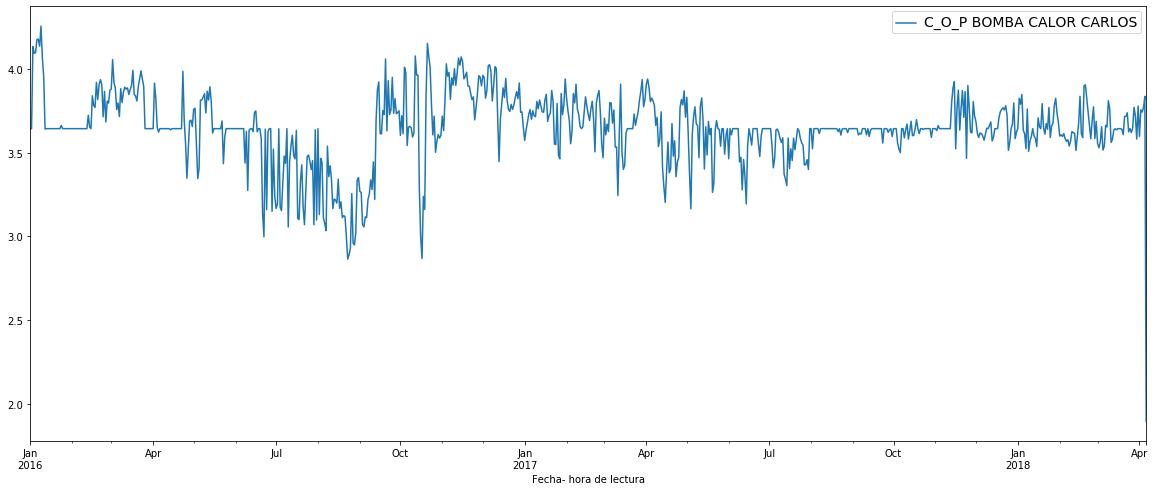

In [6]:
plot = dataTemporal1['C_O_P BOMBA CALOR CARLOS'].plot(figsize=(20, 8))
legend = plt.legend()
legend.prop.set_size(14);

## Modelos de Clasificación

### Etiquetado

In [18]:
dataClasificacion["label_cop_carlos"] = (dataClasificacion["C_O_P BOMBA CALOR CARLOS"] > 3.5) & (dataClasificacion["C_O_P BOMBA CALOR CARLOS"] < 4.5)
dataClasificacion["label_cop_felipe"] = (dataClasificacion["C_O_P BOMBA CALOR FELIPE"] > 3.5) & (dataClasificacion["C_O_P BOMBA CALOR FELIPE"] < 4.5)
dataClasificacion["label_cop_frio_1"] = (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 1"] > 3.5) & (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 1"] < 4.5)
dataClasificacion["label_cop_frio_2"] = (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 2"] > 3.5) & (dataClasificacion["C_O_P MÁQUINA GRUPO FRÍO 2"] < 4.5)
dataClasificacion.head()

,Fecha- hora de lectura,POTENCIA TRAFO 2,POTENCIA TRAFO 3,POTENCIA TRAFO 4,POTENCIA TRAFO 5,POTENCIA MEDIA CONECTADA,CONTROL FRÍO,POTENCIA BOMBA CALOR FELIPE,POTENCIA BOMBA CALOR CARLOS,TEMPERATURA AMBIENTE BOMBA CALOR CARLOS,...,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 1,KIGO FRIGORÍAS GENERADAS GRUPO DE FRÍO 2,POTENCIA TERMICA BOMBA CALOR CARLOS,POTENCIA TERMICA BOMBA CALOR FELIPE,POTENCIA TERMICA GRUPO FRIO 1,POTENCIA TERMICA GRUPO FRIO 2,label_cop_carlos,label_cop_felipe,label_cop_frio_1,label_cop_frio_2
0,2016-01-01 00:00:00,0.783603,38.338665,232.182602,235.755234,557.290039,14.568556,7.253334,7.061334,17.268667,...,4400.000488,29349.998047,33.261791,30.389183,5.117201,34.134048,True,False,False,False
1,2016-01-01 00:15:00,0.926969,38.338665,197.970230,113.384056,372.547760,14.568556,0.800000,0.480000,18.049334,...,18550.000000,163519.944304,189.995439,224.920438,21.573650,190.173695,True,False,False,False
2,2016-01-01 00:30:00,0.793163,38.455196,211.676941,236.968918,469.299347,14.568556,0.800000,0.480000,17.046000,...,218650.000000,96750.000000,120.145768,160.463017,254.289950,112.520250,True,False,True,False
3,2016-01-01 00:45:00,0.860073,38.688263,206.066818,298.481995,570.994995,14.568556,0.800000,0.480000,13.052667,...,247150.000000,214850.000000,85.926274,119.591172,287.435450,249.870550,True,False,True,True
4,2016-01-01 01:00:00,0.812257,38.688263,193.984100,292.789215,563.804016,14.568556,0.800000,0.480000,10.656666,...,238550.000000,203300.000000,58.611443,94.997792,277.433650,236.437900,True,False,True,True


### Árbol de decisión

In [8]:
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def treeClassifier(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    
    # Instantiate mode
    model = tree.DecisionTreeClassifier()
    # Train the model on training data
    model.fit(X_train, y_train)
    # Usar modelo entrenado
    predicts = model.predict(X_test)
    # exactitud
    acc = accuracy_score(y_test, predicts)
    # Precision
    pre = precision_score(y_test, predicts)
    # Sensibilidad
    sen = recall_score(y_test, predicts)
    # Puntaje F1
    f1 = f1_score(y_test, predicts)
    # Matriz de confusion
    confusionMatrix = pd.DataFrame(
        confusion_matrix(y_test, predicts),
        columns=['Predijo dentro del rango', 'Predicted fuera del rango'],
        index=['Dentro del rango', 'Fuera del rango']
    )
    print("exactitud: ", acc)
    print("Precision: ", pre)
    print("Sensibilidad: ", sen)
    print("Puntaje F1: ", f1)
    print("Matriz de confusion:\n", confusionMatrix)
    #print(predicts.tolist())
    return model

#### label_cop_frio_1

exactitud:  0.9999579584629614
Precision:  1.0
Sensibilidad:  0.9997567501824374
Puntaje F1:  0.9998783602968009
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     19675                          0
Fuera del rango                          1                       4110


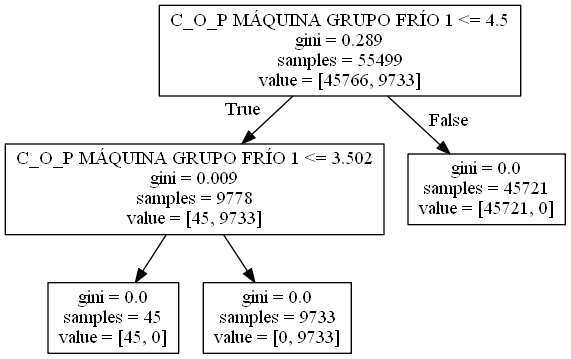

In [9]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_1"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_frio_1.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_frio_1.dot -o tree_frio_1.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_frio_1.png')

#### label_cop_frio_2

exactitud:  1.0
Precision:  1.0
Sensibilidad:  1.0
Puntaje F1:  1.0
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     16875                          0
Fuera del rango                          0                       6911


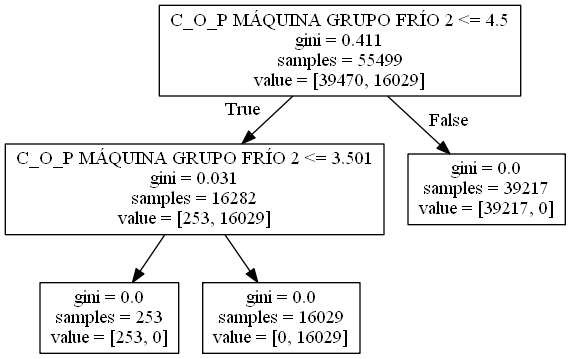

In [10]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_2"]

modeloTree = treeClassifier(X, y)

tree.export_graphviz(modeloTree, out_file='tree_frio_2.dot', feature_names=X.columns)
myCmd = 'dot -Tpng tree_frio_2.dot -o tree_frio_2.png  '
os.system(myCmd)
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_frio_2.png')

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def randomForestClassifier(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    
    # Instantiate model with 100 decision trees
    rf = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    #Predecimos para los valores del grupo Test
    predicts = rf.predict(X_test)
    # Matriz de confusion
    confusionMatrix = pd.DataFrame(
        confusion_matrix(y_test, predicts),
        columns=['Predijo dentro del rango', 'Predicted fuera del rango'],
        index=['Dentro del rango', 'Fuera del rango']
    )    
    # exactitud
    acc = accuracy_score(y_test, predicts)
    # Precision
    pre = precision_score(y_test, predicts)
    # Sensibilidad
    sen = recall_score(y_test, predicts)
    # Puntaje F1
    f1 = f1_score(y_test, predicts)
    
    print("exactitud: ", acc)
    print("Precision: ", pre)
    print("Sensibilidad: ", sen)
    print("Puntaje F1: ", f1)
    print("Matriz de confusion:\n", confusionMatrix)
    
    #Para obtener la importancia de cada variable inicializamos el  ExtraTreesClassifier
    model = ExtraTreesClassifier()
    #Ajustamos el modelo
    model.fit(X_train, y_train)
    #Pedimos que nos muestre la importancia de cada variable
    print("Importancia de cada variable del dataset\n", model.feature_importances_)
    #Para dibujar todos las variables con su importancia
    from matplotlib import pyplot
    pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
    pyplot.show()
    
    return rf

#### label_cop_frio_1

exactitud:  0.9997477507777685
Precision:  0.998799807969275
Sensibilidad:  0.9997597308986065
Puntaje F1:  0.9992795389048991
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     19619                          5
Fuera del rango                          1                       4161


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00681676 0.01305807 0.0141268  0.01422376 0.02386962 0.02680207
 0.00871378 0.00931585 0.01079978 0.01047177 0.0182601  0.00988932
 0.12867443 0.0139616  0.0426579  0.02145676 0.02195972 0.01155778
 0.30139528 0.01391083 0.00446905 0.00495061 0.01588257 0.01925074
 0.01030198 0.0093014  0.08399949 0.02213854 0.00985772 0.00974257
 0.07556834 0.01261499]


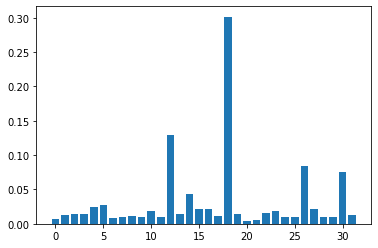

In [12]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_1"]

rf = randomForestClassifier(X, y)

#### label_cop_frio_2

exactitud:  0.999789792314807
Precision:  0.9998546088979354
Sensibilidad:  0.9994186891440198
Puntaje F1:  0.9996366014972018
Matriz de confusion:
                   Predijo dentro del rango  Predicted fuera del rango
Dentro del rango                     16904                          1
Fuera del rango                          4                       6877


C:\Users\dag17\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Importancia de cada variable del dataset
 [0.00692842 0.00610599 0.02732245 0.04671577 0.05048384 0.04400252
 0.01297939 0.01579885 0.01059318 0.01258971 0.01868198 0.03597466
 0.05965581 0.09472798 0.03220269 0.02065638 0.04143474 0.02720312
 0.01350249 0.13972507 0.00397941 0.00403037 0.01589371 0.01645452
 0.01197338 0.00698844 0.04518436 0.06457641 0.01369572 0.00654359
 0.03021354 0.06318155]


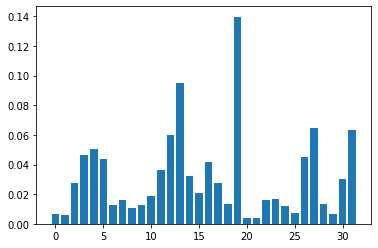

In [13]:
variables_a_eliminar = ["Fecha- hora de lectura", "label_cop_carlos", "label_cop_felipe", "label_cop_frio_1", "label_cop_frio_2"]
lista_variables = dataClasificacion.columns.values.tolist()
subLista = [x for x in lista_variables if x not in variables_a_eliminar]

X = dataClasificacion[subLista]
#Variable a clasificar
y = dataClasificacion["label_cop_frio_2"]

rf = randomForestClassifier(X, y)

## Modelos de Prediccion

### MLP

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def mLPRegressor(X, y):
    # Conjunto de entrenamiento y conjunto de testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    mlp = MLPRegressor(activation='logistic', solver='lbfgs')
    mlp.fit(X_train, y_train)
    predicts = mlp.predict(X_test)
    acc = mlp.score(X_test, y_test)
    # Error cuadratico
    mse = mean_squared_error(y_test, predicts)
    print("Accuracy: ", acc)
    print("MSE: ", mse)
    #print(predicts.tolist())
    return mlp

#### C_O_P MÁQUINA GRUPO FRÍO 1

In [15]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA GRUPO FRÍO 1', 'POTENCIA TERMICA GRUPO FRIO 1', 'TEMPERATURA EXTERIOR']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P MÁQUINA GRUPO FRÍO 1"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7282750444232831
MSE:  0.23846035762684417


#### C_O_P MÁQUINA GRUPO FRÍO 2

In [16]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA GRUPO FRÍO 2', 'POTENCIA TERMICA GRUPO FRIO 2', 'TEMPERATURA EXTERIOR']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P MÁQUINA GRUPO FRÍO 2"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.8280956650620599
MSE:  0.410205080714332


#### C_O_P BOMBA CALOR CARLOS

In [21]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA BOMBA CALOR CARLOS', 'POTENCIA TERMICA BOMBA CALOR CARLOS', 
                 'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR CARLOS']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P BOMBA CALOR CARLOS"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7572988565153141
MSE:  0.03440638779413815


#### C_O_P BOMBA CALOR FELIPE

In [23]:
# Variables a partir de las cuales se va predecir
variablesUsar = ['POTENCIA BOMBA CALOR FELIPE', 'POTENCIA TERMICA BOMBA CALOR FELIPE', 
                 'TEMPERATURA EXTERIOR', 'TEMPERATURA SALIDA BOMBA CALOR FELIPE']
X = dataPrediccion[variablesUsar]

#Variable a predecir
y = dataPrediccion["C_O_P BOMBA CALOR FELIPE"]

modeloMLP = mLPRegressor(X, y)

Accuracy:  0.7224305922038249
MSE:  0.022420545812292435
